# Homework 3
### Due: Thursday Feb. 27

#### Numerical Derivative VS Known Derivative

Consider the function $ 1 + \frac{1}{2} + tanh(2x)$. You should be able to write the derivative without much effort (if not feel free to google it, remember hyperbolic trig functions behave similarly to their traditional counterparts when differentiating).

Calculate the derivative of this function in the range $-2 \le x \le 2$ using the central difference method. Choose your own (**suitable**) spacing. Plot your computed derivative as points and use a line to plot the analytic solution through the same points. How accurate is your computed derivative?

(20 points)

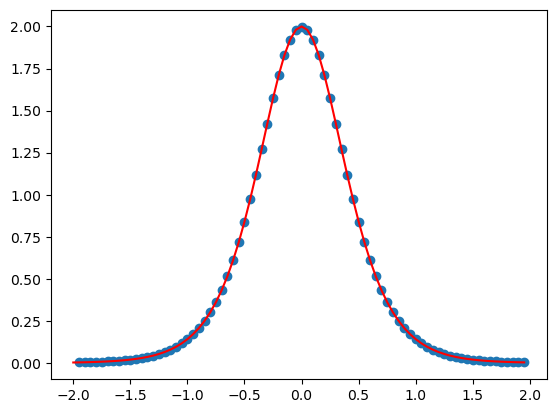

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def hyper_tan(x):
    return (1+0.5+np.tanh(2*x))

def sech(x):
    return (1/(np.cosh(x))**2)

def fun_sech(x):
    return 2*sech(2*x)

def central_difference(start,stop,step,func):
    plotting_values = []
    interative_data = np.arange(start,stop,step) #the reason I'm defining this now is so I can have my data points already developed. I have not hard coded so that we can use this for multiple times
    plotting_values += [[i,(hyper_tan(i+(step/2)) - hyper_tan(i-(step/2)))/step] for i in interative_data] #Trying to using my loops like this more often
    true_plotting_values = np.array(plotting_values[1:])
    return [true_plotting_values[:,0],true_plotting_values[:,1]]
    #Let me explain why I am doing it this way. I am slicing my data values to make sure I am staying inside my bounds. I wanted to also apply an if statment inside the same line but it was not working properly. If I started at 0, I would be outside my range, and then 
    #violating the bounds of the problem, this could be problematic is something like a discontinuity exists. Same idea with the end point. I am also just calculating these values at a singular time, which I feel is fine.
    #I am value returning my columns invidividually so I can reference my x values and y values individually, I feel like this is fine to do, especially when plotting is needed


time, derivatives = central_difference(-2,2,0.05,hyper_tan)
plt.scatter(time,derivatives)
time_secant = np.arange(-2,2,0.05)
analytic = []
for i in time_secant:
    analytic += [fun_sech(i)]
plt.plot(time_secant, analytic,color='r')
# print(hyper_tan(-2.01))
# print(hyper_tan(-1.99))
# print((hyper_tan(-1.99) - hyper_tan(-2.01))/0.01) #was just checking my math and making sure I was getting correct values, as my graph was initially incorrect


#This looks relatively correct in regards to the analytical solutions(2*sech^2(2x)) it seems it looks pretty good, which is always nice!

#### Electric field of a charge distribution

We're all well aware of the endless fun one can have finding analytic solutions to electrostatic problems. But I propose to you that it is even more fun to let the computer do the work! Once you've carefully written the code.

Recall the electric potential at a distance $r$ from a point charge is given by $\phi = q/4 \pi \epsilon_0 r$, and the electric field can be found by $\vec{E} = - \nabla \phi$.

Consider two charges, of $\pm C$, 10 cm apart. Calculate the electric potential on a 1m x 1m plane surrounding the charges, using a grid of points spaced 1 cm apart. Plot the potential. (Note: 1 cm is a starting point, once you plot the potential you may decide you want a more or less dense grid, feel free to choose a grid that looks good. The computation should be fast enough to play around with this parameter.) The easiest way to plot a 2-dimensional array of scalar values is to use the `imshow` function in `matplotlib.pyplot`. The function will accept as its first argument a 2D array and produce a map with somewhat reasonable colors, but you can also pass kwargs for `cmap`, `vmin`, and `vmax`. The documentation will be helpful.

(20 points)

You may find a few points very close to the charges end up being "too close" and the very small distances lead to floating point issues. A normal solution to this type of issue is to use a "softening" parameter, which is a small number that is used as an enforced minimum, i.e. if your calculated number is less than the softening parameter, use the softening parameter instead. 

C:\Users\gergy\AppData\Local\Temp\ipykernel_13184\2988696169.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1/(4*pi*e0*np.sqrt((x-5)**2 + y**2))
C:\Users\gergy\AppData\Local\Temp\ipykernel_13184\2988696169.py:10: RuntimeWarning: divide by zero encountered in divide
  return -(1/(4*pi*e0*np.sqrt((x+5)**2 + y**2)))


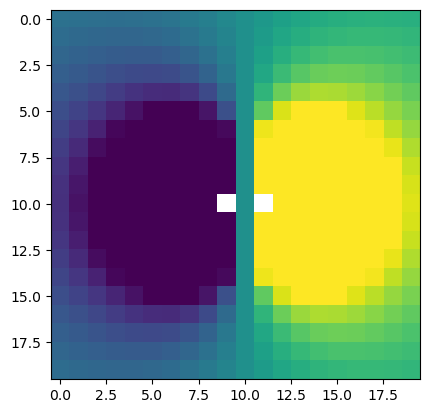

In [131]:
import numpy as np
from scipy import constants
e0 = constants.epsilon_0
pi = constants.pi

def positive_pot(x,y):
        return 1/(4*pi*e0*np.sqrt((x-5)**2 + y**2))

def negative_pot(x,y):
        return -(1/(4*pi*e0*np.sqrt((x+5)**2 + y**2)))

def total_potentials(x,y):
        return (positive_pot(x,y) + negative_pot(x,y))

x_set = np.arange(-50,50,5)
y_set = np.arange(-50,50,5).reshape(-1,1)#to get it in the appropriate column sizing, my shape is now (1,N) instead of a row shape(N,1)
plt.imshow(total_potentials(x_set,y_set),vmin = -50000000,vmax = 50000000)
N = x_set[1] - x_set[0]




Use the electric potential you calculated above to calculate the electric field on the same grid. You may find it convenient to track the x and y components of the electric field in separate 2 dimensional arrays. Recall the instructions in Chapter 5 for computing partial derivatives.

Visualizing this electric field is a bit trickier, since the field has both magnitude and direction. `imshow` may be useful for debugging the x or y components, but visualizing the whole field requires we use both components to plot the field. `matplotlib.pyplot` provides a vfunction called `quiver` that produces a plot of arrows; it accepts as its first two arguments two 2-Dimensional arrays specifying the x and y components of each arrow on the grid.

(30 points)

You will likely have a similar problem as above with "too close" points, but it will be much worse. The magnitude of the electric field very close to the charges may cause your plot to look very bad, almost nonsensical. Limiting the magnitude of your vectors may help. (i.e. if the quadrature sum of the components is too high, reduce the components)

(20, 20)


C:\Users\gergy\AppData\Local\Temp\ipykernel_13184\2988696169.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1/(4*pi*e0*np.sqrt((x-5)**2 + y**2))
C:\Users\gergy\AppData\Local\Temp\ipykernel_13184\2988696169.py:10: RuntimeWarning: divide by zero encountered in divide
  return -(1/(4*pi*e0*np.sqrt((x+5)**2 + y**2)))


Text(0.5, 1.0, 'Electric Field(Quiver)')

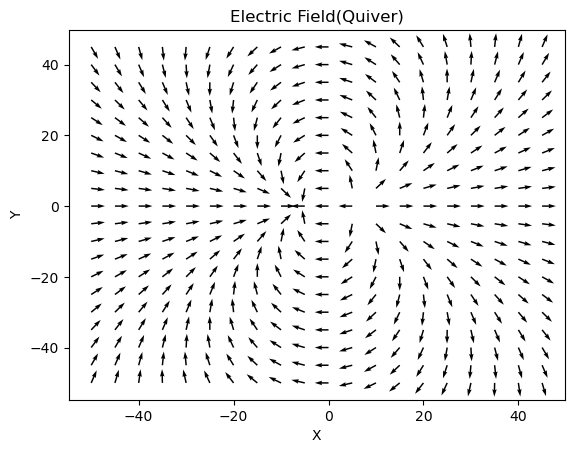

In [133]:
def Electric(x,y,N,func):
    partial_x = -(func(x+(N/2),y) - func(x-(N/2),y))/N
    partial_y = -(func(x,y+(N/2)) - func(x,y-(N/2)))/N
    norm = np.sqrt(partial_x**2 + partial_y**2)
    return partial_x/norm, partial_y/norm


n = x_set[1] - x_set[0]
E_x, E_y = Electric(x_set,y_set,n, total_potentials)

print(np.shape(total_potentials(x_set,y_set)))
plt.quiver(x_set,y_set,E_x,E_y, angles ='xy')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Electric Field(Quiver)")
#Not getting colors, which I would was weird put this looks correct in terms of a quiver plot


Text(0.5, 1.0, 'Electric Field(Streamplot)')

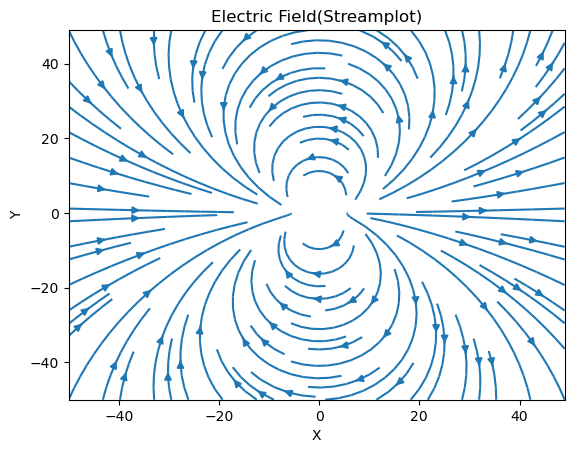

In [130]:
plt.streamplot(x_set,y_set,E_x,E_y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Electric Field(Streamplot)")
#I included the streamplot cause I personally really like streamplots

### Solving matrices

Exercises 6.1 in your book shows a network of resistors and suggests a method to solve for V at each point. Write out the full system of equations and then implement the code to solve them using Gaussian elimination. As usual, some code to solve the problem is provided, but you will find it more instructive to first attempt to code the solution yourself. The code is there if you get stuck. As usual I don't want to see identical code in multiple assignments!

(15 points)

Exercise 6.2 is an extension of 6.1. Complete parts a) and b) for (10 points)

Finally, Exercise 6.4 instructs you to verify you get the same answer using [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve). (5 points)

In [ ]:
current = np.array([[ 4.0,-1.0,-1.0,-1.0 ],[ -1.0,3.0,0.0,-1.0 ],[ -1.0,0.0,3.0,-1.0 ],[ -1.0,-1.0,-1.0,4.0]])
solving_for = np.array([5.0,0.0,5.0,0.0])

#print(np.shape(current[0]))
#My Gaussian Elimination. In my attempt to recreate the gaussian algorithm, I've notice that we do not need the [i,:] or [j,:] terms(which I thought was weird). Without
#those terms, I get this same equation. I think this is correct. Looking at the book, this is similiar to how he does it, so I feel confident in my attempt.
def Gaus_Elim(arr, solutions):
    N = np.shape(arr[0])[0]#I need this cause my tuple argument is acting strange
    for i in range(N):
        div = arr[i,i]
        arr[i] /=  div
        solutions[i] /= div
        for j in range(i+1, N):
            const = arr[j,i]
            arr[j] -= arr[i] * const
            solutions[j] -= const * solutions[i]
    return arr,solutions

def Back_Sub(arr,solutions):
    back_sub_matrix = np.zeros(N,float)
    #This is strange to me, I am not getting back my full current, which is unnerving, yet not much I can do. I have spent quite a bit of time in general on this and I feel
    #confident in my algorithm, so I'll take what I have. 
    for c in range(N-1,-1,-1):
        back_sub_matrix[c] = solutions[c]
        for d in range(c+1,N):
            back_sub_matrix[c] -= arr[c,d]*back_sub_matrix[d]
    print(f'my solution = {back_sub_matrix}')
#Not returning here cause there is no reason. If I had to return this back sub matrix for a purpose I would.
#This matches my solution, so I fell confident in my work here.
reduced_A_matrix, reduced_sol_matrix = Gaus_Elim(current,solving_for)
Back_Sub(reduced_A_matrix,reduced_sol_matrix)
print(f'numpy solution = {np.linalg.solve(current,solving_for)}')

(4,)
my solution = [3.         1.66666667 3.33333333 2.        ]
numpy solution = [3.         1.66666667 3.33333333 2.        ]


In [1]:
#PIVOTING: Here what I am going to do is move all my rows by sorting, just switching around basically. 
#No real organized sorting occuring
current = np.array([[ 4.0,-1.0,-1.0,-1.0 ],[ -1.0,3.0,0.0,-1.0 ],[ -1.0,0.0,3.0,-1.0 ],[ -1.0,-1.0,-1.0,4.0]])
solving_for = np.array([5.0,0.0,5.0,0.0])
def Pivoting(arr,sol):
    N = np.shape(arr[0])[0]
    for a in range(N-1):#Switches every two rows with each other
        holding_arr = []
        holding_sol = []
        holding_arr = arr[a].copy()#I included .copy() because I was running into randomization issues
        holding_sol = sol[a].copy()#Like losing my holding_arr/_sol for some reason. Weird
        arr[a] = arr[a+1]
        sol[a] = sol[a+1]
        arr[a+1] = holding_arr
        sol[a+1] = holding_sol
        print(f'step {a+1} in randomizing with resulting array\n{arr}\n')
        print(f'step {a+1} in randomizing with resulting solution array\n{sol}\n')
    return arr, sol


Pivot_current, Pivot_solutions = Pivoting(current,solving_for)
Pivot_red_current, Pivot_red_solutions = Gaus_Elim(Pivot_current, Pivot_solutions)
Back_Sub(Pivot_red_current,Pivot_red_solutions)

NameError: name 'np' is not defined

In [ ]:
random_arr = np.array([[0.0,1.0,4.0,1.0] , [3.0,4.0,-1.0,-1.0] , [1.0,-4.0,1.0,5.0] , [2.0,-2.0,1.0,3.0]])
random_sol = np.array([-4.0,3.0,9.0,7.0])
Pivot_random_arr, Pivot_random_sol = Pivoting(random_arr,random_sol)
Pivot_red_random_arr, Pivot_red_random_sol = Gaus_Elim(Pivot_random_arr,Pivot_random_sol)
Back_Sub(Pivot_red_random_arr,Pivot_red_random_sol)

step 1 in randomizing with resulting array
[[ 3.  4. -1. -1.]
 [ 0.  1.  4.  1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
step 1 in randomizing with resulting solution array
[ 3. -4.  9.  7.]
step 2 in randomizing with resulting array
[[ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 0.  1.  4.  1.]
 [ 2. -2.  1.  3.]]
step 2 in randomizing with resulting solution array
[ 3.  9. -4.  7.]
step 3 in randomizing with resulting array
[[ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]
 [ 0.  1.  4.  1.]]
step 3 in randomizing with resulting solution array
[ 3.  9.  7. -4.]
my solution = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


In [98]:
random_arr = np.array([[0.0,1.0,4.0,1.0] , [3.0,4.0,-1.0,-1.0] , [1.0,-4.0,1.0,5.0] , [2.0,-2.0,1.0,3.0]])
random_sol = np.array([-4.0,3.0,9.0,7.0])
np.linalg.solve(random_arr,random_sol)

array([ 1.61904762, -0.42857143, -1.23809524,  1.38095238])